<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2.3 Independent Variables and Random Samples**
Important Topics:
* Joint Probability Distributions
* Correlation and Dependence
* Random Samples



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

#### **Joint Probability Distributions**:
- Joint probability is the probability of two or more events
happening together.
 * A joint probability distribution shows a probability distribution for two (or more) random variables.
* PMF can be extended for two variables:
 * $p(x, y) = P(X = x$ and $Y = y)$
 * $p(x, y) ≥ 0$ and $∑_x ∑_y p(x, y) = 1$
* The marginal probability mass function of X and Y, denoted by
pX (x), pY (y) is given by:
 * $pX (x) = ∑_{y:p(x,y)>0}p(x, y)$ for each possible value x
 * $pY (y) = ∑_{x:p(x,y)>0}p(x, y)$ for each possible value y
* Let X and Y be continuous random variables:
 * A joint probability density function $f (x, y)$ for these two variables is a function satisfying
$f (x, y) ≥ 0$ and $∫^∞_{−∞}∫ ^∞_{−∞} f (x, y)dxdy = 1$
 * Then for any two-dimensional set A:
   $P[(X,Y ) ∈ A] =∫∫_A f (x, y)dxdy$
 * In particular, if A is the two-dimensional rectangle {(x, y) : a ≤ x ≤ b, c ≤ y ≤ d}:
then
$P[(X,Y ) ∈ A] = P(a ≤ X ≤ b, c ≤ Y ≤ d) =
∫^b_a∫^d_cf (x, y)dydx$
* Two random variables X and Y are said to be independent
if for every pair of x and y values:
 * $p(x, y) = pX (x) · pY (y)$ when X and Y are discrete\
or
 * $f (x, y) = fX (x) · fY (y)$ when X and Y are continuous
* Suppose that the lifetimes of two components are independent
of one another and that the first lifetime, X1, has an exponential distribution
with parameter
λ1, whereas the second, X2, has an exponential distribution
with parameter
λ2. Then the joint pdf is:
 * $f (x_1, x_2) + fX_1 (x_1) · fX_2 (x_2)$\
= $λ_1e−λ_1x_1 ·λ_2e−λ_2x_2 =λ_1λ_2e−λ_1x_1−λ_2x_2$ $x_1 > 0, x_2 > 0$\
 = 0 otherwise
 \
 * Can extend this to more than just two variables:
  - $P (a1 ≤ X1 ≤ b1, . . . , an ≤ Xn ≤ bn) =
∫^{b_1}_
{a_1}
. . .
∫^{b_n}
_{a_n}
f (x_1, . . . , x_n) dx_n . . . dx_1$

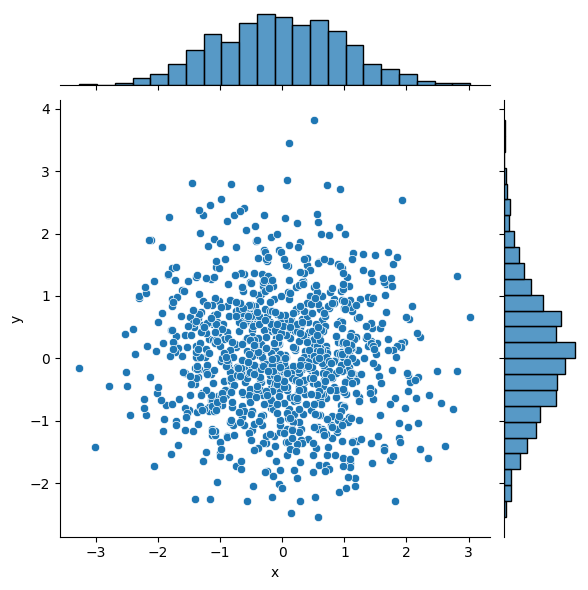

In [12]:
import seaborn as sns

x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)

df = pd.DataFrame({'x':x, 'y': y})

sns.jointplot(x = 'x', y = 'y', data = df);


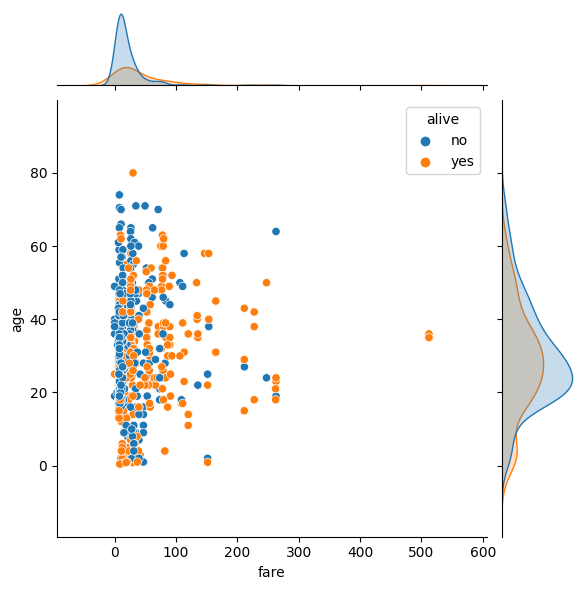

In [3]:
data = sns.load_dataset("titanic")
sns.jointplot(x = 'fare', y = 'age', data = data, hue = "alive");

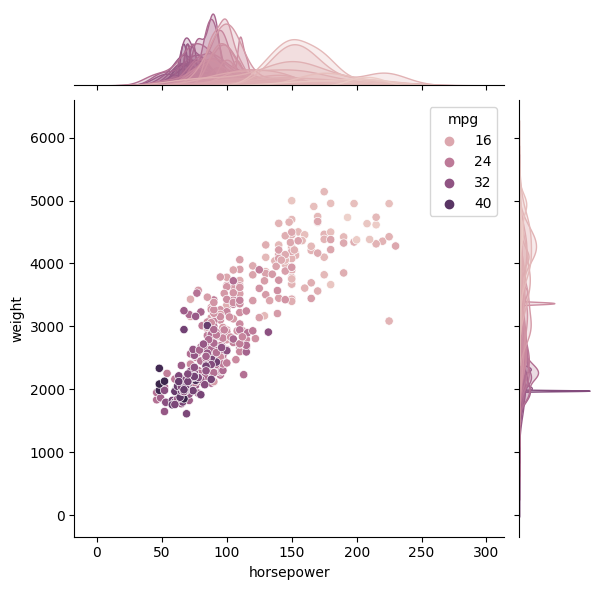

In [4]:
data = sns.load_dataset("mpg")
sns.jointplot(x = 'horsepower', y = 'weight', data = data, hue = "mpg");

#### **Correlation and Dependence**:
* Correlations are useful because they can indicate a predictive relationship
that can be exploited in practice.
* Covariance is a measure of the joint variability of two random variables.
* The covariance between two random variable’s X and Y is
 * $Cov(X,Y ) = E [(X −
μ_X ) (Y −
μ_Y )]$ =
 * X,Y discrete:$∑_x ∑_y (x −
μ_X ) (y −
μ_Y ) p(x, y)$
 * X,Y continuous: $
∫_{−∞}
^∞∫ ^∞_{
−∞} (x −
μ_X ) (y −
μ_Y ) f (x, y)dxdy$
* Has three cases: covarience is positive, negative, or near zero
* Correlation coefficents have the following properties:
 * If X and Y are independent, then
ρ = 0, but
ρ = 0 does not imply independence.
 * |ρ| ≤ 1,
ρ = 1 or -1 if Y = aX + b for some numbers a and b with a ≠ 0
* $r = \frac{S_{xy}}{S_xS_y}$, $S_{xy}$ is the sample covariance, $S_x$,$S_y$ is the sample standard deviation
 * r will be ∈ [-1,1]. if |r| is closer to 1, the correlation is higher.

r: -0.7773335555833123


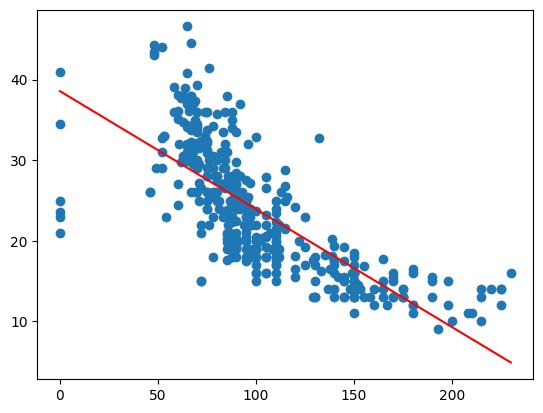

In [5]:
seriesX = data['horsepower']
seriesY = data['mpg']

Sxy = seriesX.cov(seriesY)
Sx = seriesX.std()
Sy = seriesY.std()

r = (Sxy/(Sx*Sy))
print(f"r: {r}")
#since |r| is large, we know correlation is high.
#since r is negative, we know that as horsepower increases, mpg decreases (or vicecersa)
seriesX = np.nan_to_num(seriesX)
seriesY = np.nan_to_num(seriesY)

plt.scatter(seriesX, seriesY)
plt.plot(np.unique(seriesX), np.poly1d(np.polyfit(seriesX, seriesY, 1))
         (np.unique(seriesX)), color='red')
plt.show()


#### **Random Samples**:
* A simple random sample is a randomly selected subset of a population and
often is used in practice.
* The random variable’s $X_1, X_2, . . . , X_n$ are said to form a (simple) random sample of size n if:
 * 1. The $X_i$ ’s are independent random variable’s .
 * 2. Every $X_i$ has the same probability distribution.
* Cental Limit Therom:
 * If you take a random sample of a set of data, store the mean of the sample into a new dataset, and continue to take the mean of more samples, storing these, the distribution of your new set will be normal.

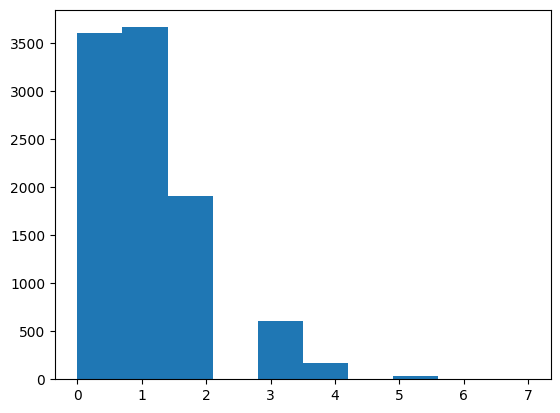

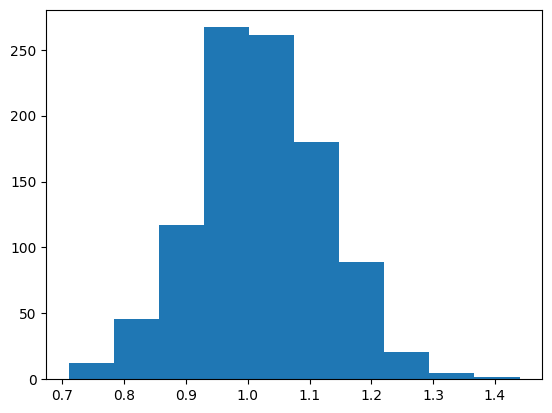

In [37]:
def mean(lst):
    return sum(lst) / len(lst)

x = np.random.poisson(size = 10000)
z = [0]*100
k = []
for i in range(1000):
  for l in range(100):
    z[l] = (x[random.randint(0,9999)])
  k.append(mean(z))

plt.hist(x)
plt.show()
#Intitial values form Poisson Distribution

plt.hist(k)
plt.show()
#Values from the sample means form Normal Distribution

